<a href="https://colab.research.google.com/github/Theveetha/LendingClub_EDA_CaseStudy/blob/main/LendingClub_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Lending Club EDA Case Study***

**Data:** Lending Club is a company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant's profile. This dataset gives us a details of the applicant's and their current status.

**To Analyse:** Do a general EDA on how the various factors plays a role in applicant's loan status.

### **INITIAL SETUP**
**SECTION GOAL**
1. Import the required Libraries
2. Connect to the google drive to load the dataset
3. Read the csv file and create a Dataframe

##### **Import Required Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### **Mount Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##### **Import and Read the Dataset**

In [3]:
file_path = '/content/drive/MyDrive/Stats&ML_Dataset/loan.csv'
data = pd.read_csv(file_path)

# To display all columns and all rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Creating a local copy
cpy_data = data
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### **UNDERSTANDING THE DATA**
**SECTION GOAL:**
1. To get a basic understanding of the dataset provided
2. Figure out the numerical and categorical features of dataset
3. Analyze each column to understand the missing values
4. Find out which all columns are having more than 30% missing values
5. Check if the dataframe has any repeated or duplicate values

##### **Dimensions**

In [4]:
data.shape
print(f"Number of Columns : {data.shape[1]}")
print(f"Number of Rows : {data.shape[0]}")

Number of Columns : 111
Number of Rows : 39717


##### **Columns before preprocessing data**

In [5]:
print("Features before preprocessing the data")
col = []
for cols in data.columns:
  col.append(cols)
print(col)

Features before preprocessing the data
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m'

##### **Numerical and Categorical Columns**

In [6]:
num, obj = 0,0
for feature in data.columns:
  if data.dtypes[feature] != 'O':
    num += 1
  else:
    obj += 1
label = ['Numerical','Categorical']
count = [num,obj]
data_dict = {'Columns':label,'Count':count}
pd.DataFrame(data_dict)

,Columns,Count
0,Numerical,87
1,Categorical,24


##### **Analysis on Categorical Column**

In [7]:
cat_cols_df = pd.DataFrame(data.select_dtypes('object').apply(pd.Series.nunique, axis = 0))
cat_cols_df.reset_index(inplace=True)
cat_cols_df.columns = ['Column Name', 'Unique Values Count']

In [8]:
filtered_cols = cat_cols_df[
    (cat_cols_df['Unique Values Count'] == 1) |  # Single unique value
    (cat_cols_df['Unique Values Count'] == data.shape[0])  # All unique values
]

cat_cols_remove = filtered_cols['Column Name'].tolist()
filtered_cols.sort_values('Unique Values Count',ascending=True,inplace=True)
print("Categorical Column having Single Unique Value : 3\nColumns having all the values as unique : 1")
print("******************************************")
filtered_cols

Categorical Column having Single Unique Value : 3
Columns having all the values as unique : 1
******************************************


,Column Name,Unique Values Count
10,pymnt_plan,1
19,initial_list_status,1
23,application_type,1
11,url,39717


##### **OBSERVATION - CATEGORICAL COLUMN**
The categorical columns which are having single unique value (**pymnt_plan, initial_list_status, application_type**) doesn't impact or aid our analysis.

The categorical columns which have all the values to be unique (**url**) based on the description isn't going to aid our analysis

***To Do:***

Remove the above mentioned **4 columns** from the dataframe

##### **Analysis on Numerical Column**

In [9]:
num_cols_df = pd.DataFrame(data.select_dtypes(exclude='object').apply(pd.Series.nunique, axis = 0))
num_cols_df.reset_index(inplace=True)
num_cols_df.columns = ['Column Name', 'Unique Values Count']

In [10]:
filtered_cols = num_cols_df[
    (num_cols_df['Unique Values Count'] == 1) | # Single unique values
    (num_cols_df['Unique Values Count'] == data.shape[0]) # All unique values
]
num_cols_remove = filtered_cols['Column Name'].tolist()
filtered_cols.sort_values('Unique Values Count',ascending=True,inplace=True)
print("Numerical Column having Single Unique Value : 5\nColumns having all the values as unique : 2")
print("******************************************")
filtered_cols

Numerical Column having Single Unique Value : 5
Columns having all the values as unique : 2
******************************************


,Column Name,Unique Values Count
26,collections_12_mths_ex_med,1
28,policy_code,1
32,acc_now_delinq,1
54,chargeoff_within_12_mths,1
55,delinq_amnt,1
82,tax_liens,1
0,id,39717
1,member_id,39717


##### **OBSERVATION - NUMERICAL COLUMN**
The numerical columns which are having single unique value (collections_12_mths_ex_med, policy_code, acc_now_delinq, chargeoff_within_12_mths, delinq_amnt, tax_liens) doesn't impact or aid our analysis.

The numerical columns which have all the values to be unique (id, member_id) based on the description isn't going to aid with our current analysis.

***To Do:***

Remove the above mentioned 6 columns from the dataframe

##### **Missing values**

In [11]:
mis_val = data.isnull().sum()
mis_val_percent = round(100 * data.isnull().sum()/len(data),2)
mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
mis_val_table.columns = ['Missing Values', '% of Total Values']
mis_val_table = mis_val_table.sort_values('% of Total Values',ascending=False)

Category = []

for i in range(0,len(mis_val_table)):
  if mis_val_table['% of Total Values'][i] == 0:
    Category.append('Missing % = 0')
  elif 0 < mis_val_table['% of Total Values'][i] <= 30:
    Category.append('Missing % < 30')
  else:
    Category.append('Missing % > 30')

mis_val_table['Category'] = Category
mis_val_table.reset_index(inplace=True)
mis_val_table.rename(columns={'index':'Column Name'},inplace=True)
# Add Data Types
data_types = [data[col].dtypes for col in mis_val_table['Column Name'].values]
mis_val_table['Data Type'] = data_types

mis_val_gt30 = mis_val_table[mis_val_table['Category'] == 'Missing % > 30']
mis_val_lt30 = mis_val_table[mis_val_table['Category'] == 'Missing % < 30']
mis_val_lt30

,Column Name,Missing Values,% of Total Values,Category,Data Type
58,emp_title,2459,6.19,Missing % < 30,object
59,emp_length,1075,2.71,Missing % < 30,object
60,pub_rec_bankruptcies,697,1.75,Missing % < 30,float64
61,last_pymnt_d,71,0.18,Missing % < 30,object
62,collections_12_mths_ex_med,56,0.14,Missing % < 30,float64
63,chargeoff_within_12_mths,56,0.14,Missing % < 30,float64
64,revol_util,50,0.13,Missing % < 30,object
65,tax_liens,39,0.10,Missing % < 30,float64
66,title,11,0.03,Missing % < 30,object
67,last_credit_pull_d,2,0.01,Missing % < 30,object


##### **Graphical representation**

In [12]:
# Function to remove the border in graph
def section(sec):
  sec.spines['bottom'].set_visible(True)
  sec.spines['top'].set_visible(False)
  sec.spines['left'].set_visible(False)
  sec.spines['right'].set_visible(False)
  return sec

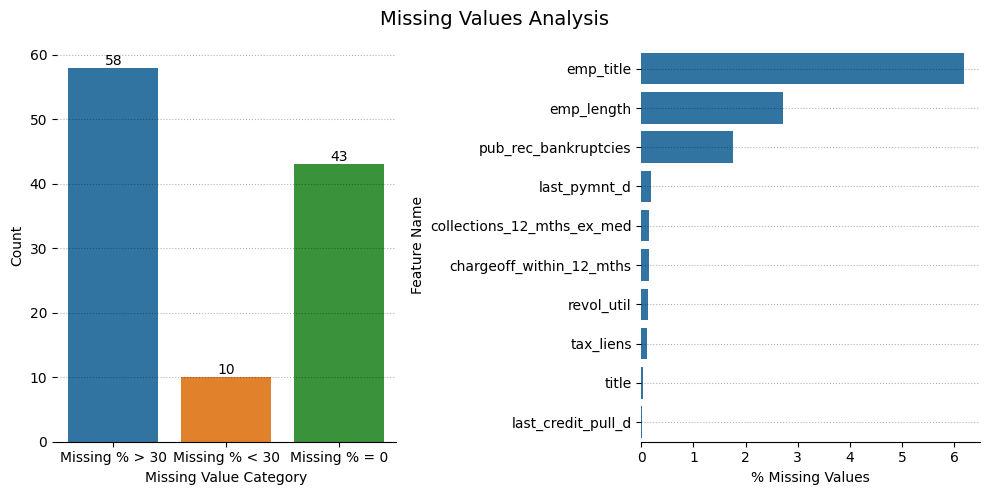

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Distribution of Missing Values
sns.countplot(ax=axes[0], data=mis_val_table, x='Category', hue='Category')
for containers in axes[0].containers:
    axes[0].bar_label(containers)
axes[0].set_xlabel('Missing Value Category')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle=':', color='black', alpha=0.3)
section(axes[0])

# Columns with Missing Values < 30%
sns.barplot(ax=axes[1], data=mis_val_table[mis_val_table['Category'] == 'Missing % < 30'],
            x='% of Total Values', y=mis_val_table[mis_val_table['Category'] == 'Missing % < 30']['Column Name'])
axes[1].grid(axis='y', linestyle=':', color='black', alpha=0.3)
axes[1].set_ylabel('Feature Name')
axes[1].set_xlabel('% Missing Values')
section(axes[1])

fig.suptitle('Missing Values Analysis', fontsize=14)
plt.tight_layout()
plt.show()

In [14]:
data['pub_rec_bankruptcies'].describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

##### **OBSERVATION - MISSING VALUE**
Columns having more than 30% missing value (58 columns) will lead to biased output.

Columns having more than 0% and less than 30% missing values (10 columns) need to be treated for further analysis.

***To Do:***
1. Remove those 58 columns from our dataframe
2. For categorical column replace the missing value with mode
3. For numerical column replace the missing value with median since the mean and median value are close

##### **Find Duplicate Rows**

In [15]:
count = data[data.duplicated()].shape
print(f"There are no duplicates in the dataset" if count[0]==0 else f"There are {count[0]} duplicates in the dataset")

There are no duplicates in the dataset


##### **OBSERVATION - DUPLICATE ROWS**
There are no Duplicate records in the dataset.

***To Do:***

There is no action required

### **DATA PREPROCESSING**
**SECTION GOAL:**
Based on our observations from basic understanding of the data we have to do the below mentioned data preprocessing:
1. Delete the unrequired columns
2. Handle the missing values by replacing it with either mode or median correspondingly

###### **Handle Missing Value**

In [16]:
for col in data[mis_val_lt30['Column Name'].values]:
  if data[col].dtype == 'object':
    data.fillna(data[col].mode()[0], inplace=True)
  else:
    data.fillna(data[col].median()[0], inplace=True)

print(f"Count of columns having missing values : {len(data.columns[data.isnull().any()])}")

Count of columns having missing values : 0


###### **Remove Columns**

In [17]:
from itertools import chain
remove_cols = list(chain(cat_cols_remove,num_cols_remove,mis_val_gt30['Column Name'].values))

data.drop(columns=remove_cols,inplace=True)
print(f"Post cleanup there are {data.shape[1]} columns present in our dataframe")

Post cleanup there are 41 columns present in our dataframe


### **EXPLORATORY DATA ANALYSIS**
**SECTION GOAL:**
1. Get an overall understanding of individual columns by refering Data Dictionary
2. Know which all variables are important
3. View Summary Statistics
4. Visualize the data

##### **Data Dictionary**

In [24]:
data_desc = pd.read_excel('/content/drive/MyDrive/Stats&ML_Dataset/LendingClub_Description.xlsx')
data_desc

,Column Name,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,funded_amnt,The total amount committed to that loan at tha...
2,funded_amnt_inv,The total amount committed by investors for th...
3,term,The number of payments on the loan. Values are...
4,int_rate,Interest Rate on the loan
5,installment,The monthly payment owed by the borrower if th...
6,grade,LC assigned loan grade
7,sub_grade,LC assigned loan subgrade
8,emp_title,The job title supplied by the Borrower when ap...
9,emp_length,Employment length in years. Possible values ar...


##### **OBSERVATION - DATA DICTIONARY**
Based on the Data Description provided for each feature we can see few columns are irrelavant to make a decision on loan approval. So we can remove such columns.
1. emp_title
2. title
3. zip_code
4. addr_state

There are few other columns which are have no contribution to our analysis, as they are derived post apporval of our loan. So we can remove those columns also
1. delinq_2yrs
2. earliest_cr_line
3. revol_bal
4. out_prncp
5. out_prncp_inv
6. total_pymnt
7. total_rec_prncp
8. total_rec_int
9. total_rec_late_fee
10. recoveries
11. collection_recovery_fee
12. last_pymnt_d
13. last_pymnt_amnt
14. last_credit_pull_d